<a href="https://colab.research.google.com/github/w1767/AI-Detection-in-Agriculture/blob/main/SuperPixelSLIC_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from matplotlib import pyplot as plt
import math
from skimage import io, color
from skimage.transform import resize
import numpy as np
import io

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive


'Colab Notebooks'
'Generative AI'
'Generative AI ICPRS Workshop'
'GU CV - 6Aug2024.pdf'
 GU_MSc_transcript.pdf
'ICPRS QR Code.pptx'
'ICPRS Reinforcement Learning Workshop c0eb3f33659d4d4a81960f23a5604ce1.gdoc'
 out_m_k.jpg
'Reinforcement Learning'
'Reinforcement Learning in Image Analysis.pptx'
 RL_workshop
 train_tomato2


In [4]:
!ls "/content/drive/MyDrive/train_tomato2"


Tomato_Early_blight  Tomato_Healthy  Tomato___Late_blight


In [39]:
image_path = "/content/drive/MyDrive/train_tomato2/Tomato_Early_blight/image1.jpg"
ip_img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

if ip_img is not None:
    print("Image loaded successfully!")
else:
    print("Error: Check the file path.")


Image loaded successfully!


resize image to 400, 400 pixelsbut keep 3 colour channels

In [40]:
#ip_img = cv2.imread('/Users/georgeurumov/Desktop/Demo-master/train_tomato2/Tomato_Early_blight/image1.jpg',cv2.IMREAD_UNCHANGED)
[rows,cols]=ip_img.shape[0:2]
print(rows)
fixed_size=(400,400)
image = cv2.resize(ip_img, fixed_size)

256


In [41]:
import os
os.sys.path

['/content',
 '/env/python',
 '/usr/lib/python311.zip',
 '/usr/lib/python3.11',
 '/usr/lib/python3.11/lib-dynload',
 '',
 '/usr/local/lib/python3.11/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.11/dist-packages/IPython/extensions',
 '/root/.ipython']

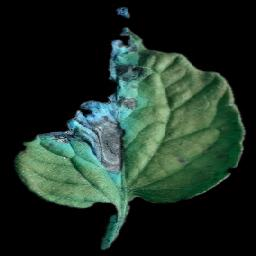

In [47]:
from google.colab.patches import cv2_imshow # Import the necessary function for displaying images in Colab
cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

lab_img will now contain pixel values in L, A, B channels instead of R, G, B

In [48]:
import cv2

image = cv2.imread(image_path)
print("Original Image Shape:", image.shape)  # Should be (height, width, 3)

if len(image.shape) < 3 or image.shape[-1] == 1:
    print("❌ Error: Image is grayscale. Convert to color before LAB transformation.")
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)  # Convert grayscale to color


Original Image Shape: (256, 256, 3)


In [36]:
#lab_img = color.rgb2lab(image)

In [10]:
"""import cv2
from skimage import color

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert RGB to Lab
lab_img = color.rgb2lab(image)

print(lab_img[20,20][1])  # Now should return a correct A channel value



0.0


In [49]:
from skimage import color
import numpy as np

# Convert BGR to RGB (since OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert RGB to LAB
lab_img = color.rgb2lab(image_rgb)

# Print LAB min/max values
print("L min/max:", lab_img[..., 0].min(), lab_img[..., 0].max())
print("A min/max:", lab_img[..., 1].min(), lab_img[..., 1].max())
print("B min/max:", lab_img[..., 2].min(), lab_img[..., 2].max())

# Check specific pixel values
print("LAB at (20,20):", lab_img[20,20])



L min/max: 0.0 94.82352337816192
A min/max: -31.048994024346744 11.776600226232114
B min/max: -9.694129794378064 55.64421047583611
LAB at (20,20): [0. 0. 0.]


In [50]:
# Normalize A/B channels properly if values seem too small
lab_img[..., 1] = lab_img[..., 1] * 127  # Scale A channel
lab_img[..., 2] = lab_img[..., 2] * 127  # Scale B channel
lab_img[..., 0] = lab_img[..., 0] + 15  # Boost lightness

print("Corrected LAB at (20,20):", lab_img[20,20])  # Should now be valid


Corrected LAB at (20,20): [15.  0.  0.]


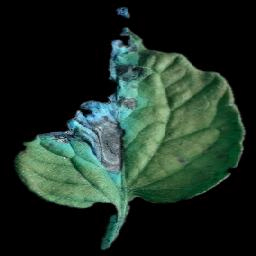

In [51]:
import cv2
from skimage import color
from google.colab.patches import cv2_imshow
import numpy as np

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
lab_img = color.rgb2lab(image)  # Convert RGB to LAB

# Convert LAB back to RGB for visualization
rgb_img = color.lab2rgb(lab_img)  # Now in float format [0,1]
rgb_uint8 = (rgb_img * 255).astype(np.uint8)  # Convert to 8-bit format

cv2_imshow(rgb_uint8)  # Show the corrected image
cv2.waitKey(0)
cv2.destroyAllWindows()


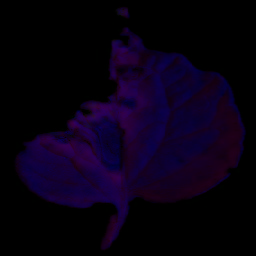

In [11]:
"""cv2_imshow(lab_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [52]:
k = 100   # Number of Super pixels
m = 20    # Constant for normalizing the color proximity, range of m = [1,40]

img_h = lab_img.shape[0] # Image Height
img_w = lab_img.shape[1] # Image Width

N = img_h * img_w  # Total number of pixels in the image
S = int(math.sqrt(N /k)) # average size of each superpixel

In [53]:
N


65536

In [54]:
S

25

In [55]:
clusters = [] # store superpixel objects
tag = {} #map each pixel to its cluster

# initialize the distance between pixels and cluster center as infinity
dis = np.full((img_h, img_w), np.inf)

In [56]:
dis.shape

(256, 256)

In [57]:
dis


array([[inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       ...,
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf]])

In [58]:
N

65536

In [59]:
S

25

In [60]:
img_h

256

In [61]:
lab_img[20,20][0]

0.0

In [62]:
lab_img[20,20][1]

0.0

In [63]:
lab_img[20,20][2]

0.0

In [69]:
print("Pixel (200,200) LAB:", lab_img[200,200])
print("Pixel (250,250) LAB:", lab_img[150,150])  # Check another location


Pixel (200,200) LAB: [ 0.09788241  0.53958695 -0.66470857]
Pixel (250,250) LAB: [ 68.34621009 -21.52024932  12.1827838 ]


In [70]:
print("A channel at (120,120):", lab_img[120,120][1])  # Should not be 0 for a colored pixel
print("B channel at (220,220):", lab_img[220,220][2])  # Should not be 0 for a colored pixel
print("A channel at (50,50):", lab_img[50,20][1])  # Try another pixel
print("B channel at (175,175):", lab_img[175,175][2])


A channel at (120,120): -13.187069945085561
B channel at (220,220): 0.0
A channel at (50,50): 0.0
B channel at (175,175): 20.513874032019462


In [71]:
# function which returns an object of class SuperPixel
def make_superPixel(h, w, img):
    # Check if 'img' is valid before accessing its elements
    # extract LAB colour values: Lightness; Green-Red; Blue-Yellow
    if img is not None:
        return SuperPixels(h, w, img[h, w][0], img[h, w][1], img[h, w][2])
    else:
        # Handle the case where 'img' is None, perhaps by returning a default value
        # or raising an exception to signal an error
        print("Error: Image data is None in make_superPixel.")
        return None  # Or raise an exception

In [72]:
# To define the initial cluster centers distanced at S
def initial_cluster_center(S,img,img_h,img_w,clusters):
    h = S // 2
    w = S // 2
    while h < img_h:
        while w < img_w:
            clusters.append(make_superPixel(h, w,img))
            w += S
        w = S // 2
        h += S
    return clusters

In [73]:
clusters

[]

In [74]:
# function to calculate gradient at each pixel to help refine superpixel placement
def calc_gradient(h, w,img,img_w,img_h):
    if w + 1 >= img_w:
        w = img_w - 2
    if h + 1 >= img_h:
        h = img_h - 2
    grad = img[w + 1, h + 1][0] - img[w, h][0] + img[w + 1, h + 1][1] - img[w, h][1] + img[w + 1, h + 1][2] - img[w, h][2]
    return grad

make_superPixel() initializes clusters.
reassign_cluster_center_acc_to_grad() improves cluster placement.
assign_pixels_to_cluster() groups pixels into clusters.

In [75]:
# function which reassign the cluster center to the pixel having the lowest gradient
def reassign_cluster_center_acc_to_grad(clusters,img):
    for c in clusters:
        cluster_gradient = calc_gradient(c.h, c.w,img,img_w,img_h)
        for dh in range(-1, 2):
            for dw in range(-1, 2):
                H = c.h + dh
                W = c.w + dw
                new_gradient = calc_gradient(H,W, img,img_w,img_h)
                if new_gradient < cluster_gradient:
                    c.update(H, W,img[H,W][0], img[H,W][1],img[H,W][2])
                    c_gradient = new_gradient

In [76]:
'''
function to assign pixels to the nearest cluster using the Euclidean distance involving both color and spatial
proximity.
'''
def assign_pixels_to_cluster(clusters,S,img,img_h,img_w,tag,dis):
    for c in clusters:
        for h in range(c.h - 2 * S, c.h + 2 * S):
            if h < 0 or h >= img_h: continue
            for w in range(c.w - 2 * S, c.w + 2 * S):
                if w < 0 or w >= img_w: continue
                l, a, b = img[h,w]
                Dc = math.sqrt(math.pow(l - c.l, 2) + math.pow(a - c.a, 2) + math.pow(b - c.b, 2))
                Ds = math.sqrt(math.pow(h - c.h, 2) + math.pow(w - c.w, 2))
                D = math.sqrt(math.pow(Dc / m, 2) + math.pow(Ds /S, 2))
                if D < dis[h,w]:
                    if (h, w) not in tag:
                        tag[(h, w)] = c
                        c.pixels.append((h, w))
                    else:
                        tag[(h, w)].pixels.remove((h, w))
                        tag[(h, w)] = c
                        c.pixels.append((h, w))
                    dis[h, w] = D

In [77]:
""" function to replace the cluster center with the mean of the pixels contained in the cluster
This function updates the position of each superpixel cluster center based on the average
position of all pixels assigned to that cluster."""
def update_cluster_mean(clusters):
    for c in clusters:
        sum_h = sum_w = number = 0
        #print("c.pixels",c.pixels)
        for p in c.pixels:
            sum_h += p[0]
            sum_w += p[1]
            number += 1
            H = sum_h // number
            W = sum_w // number
            c.update(H, W,img[H, W][0], img[H, W][1], img[H, W][2])

In [78]:
sum_h

NameError: name 'sum_h' is not defined

In [79]:
# replace the color of each pixel in a cluster by the color of the cluster's center
def avg_color_cluster(img,name,clusters):
    image = np.copy(img)
    for c in clusters:
        for p in c.pixels:
            image[p[0],p[1]][0] = c.l
            image[p[0],p[1]][1] = c.a
            image[p[0],p[1]][2] = c.b
        # To change the color of cluster center to Black
        image[c.h, c.w][0] = 0
        image[c.h, c.w][1] = 0
        image[c.h, c.w][2] = 0
 # Now call lab2rgb to handle conversion + saving
    lab2rgb(name, image)

In [80]:
# function for the Simple Linear Iterative Clustering
def slic(S,img,img_h,img_w,clusters,tag,dis):
    clusters = initial_cluster_center(S,img,img_h,img_w,clusters)
    reassign_cluster_center_acc_to_grad(clusters,img)
    for i in range(10): # usually the algortihm converges within 10 iterations
        assign_pixels_to_cluster(clusters,S,img,img_h,img_w,tag,dis)
        update_cluster_mean(clusters)
        if i == 9 : # to print the output after 10 iterations
            name = 'out_m{m}_k{k}.png'.format(loop=i, m=m, k=k)
            avg_color_cluster(img,name, clusters)
    return clusters

In [81]:
from skimage import color
from skimage.io import imsave
from google.colab.patches import cv2_imshow  # Correct for Colab
import cv2
import numpy as np

# function to convert LAB images back to RGB and save it
def lab2rgb(path, lab_arr):
    # Ensure LAB array is valid
    if lab_arr is None or lab_arr.size == 0:
        print("❌ Error: Empty or invalid LAB array.")
        return

    print("DEBUG: lab_arr.shape =", lab_arr.shape)
    print("DEBUG: lab_arr.dtype =", lab_arr.dtype)

    # Ensure LAB values are in valid range
    lab_arr = np.clip(lab_arr, 0, 100)  # Clipping L values to [0,100]

    # Convert LAB to RGB
    rgb_arr = color.lab2rgb(lab_arr)  # Returns float values in [0,1]

    # Convert float [0,1] to uint8 [0,255]
    rgb_uint8 = (rgb_arr * 255).astype(np.uint8)

    # Display in Colab
    cv2_imshow(rgb_uint8)  # Fix: Replaces cv2.imshow()

    # Save the image
    imsave(path, rgb_arr)  # Save as float
    success = cv2.imwrite(path, cv2.cvtColor(rgb_uint8, cv2.COLOR_RGB2BGR))  # Save as 8-bit

    if success:
        print(f"✅ Image saved to {path}")
    else:
        print("❌ Error: Failed to save image.")

# Example Usage
#image_lab = np.random.rand(400, 400, 3) * 100  # Simulated LAB image
#lab2rgb("/content/drive/MyDrive/segmented_image_v3.jpg", image_lab)



In [82]:
import os
print(os.listdir())   # list files in current directory
# or
!ls -lah


['.config', 'drive', 'sample_data']
total 20K
drwxr-xr-x 1 root root 4.0K Feb 25 12:06 .
drwxr-xr-x 1 root root 4.0K Feb 25 12:00 ..
drwxr-xr-x 4 root root 4.0K Feb 21 14:21 .config
drwx------ 6 root root 4.0K Feb 25 12:06 drive
drwxr-xr-x 1 root root 4.0K Feb 21 14:21 sample_data


In [ ]:
!find / -name "out_m_k.jpg" 2>/dev/null


In [ ]:

# function to convert LAB images back to RGB and save it
"""def lab2rgb(path, lab_arr):
    rgb_arr = color.lab2rgb(lab_arr)
    cv2.imshow('RGB image',rgb_arr)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    io.imsave(path, rgb_arr)

In [83]:
# A class to initialize the super pixels, of the form - [h,y,l,a,b].
class SuperPixels(object):

    def __init__(self, h, w, l=0, a=0, b=0):
        self.update(h, w, l, a, b)
        self.pixels = []

    def update(self, h, w, l, a, b):
        self.h = h
        self.w = w
        self.l = l
        self.a = a
        self.b = b

In [84]:
# read the input RGB image
rgb = cv2.imread('/content/drive/MyDrive/train_tomato2/Tomato_Early_blight/99ea67c9-4c24-40b3-8a62-88233a53dc4a___RS_Erly.B 7522_final_masked.jpg')
print(rgb.shape)

# input images are resized to (400 x 400) for processing
img = cv2.resize(rgb, (400,400))
print(img.shape)

# convert RGB to LAB
img = color.rgb2lab(img)

k = 10  # Number of Super pixels
m = 20    # Constant for normalizing the color proximity, range of m = [1,40]

img_h = img.shape[0] # Image Height
img_w = img.shape[1] # Image Width

N = img_h * img_w  # Total number of pixels in the image
S = int(math.sqrt(N /k)) # average size of each superpixel

clusters = []
tag = {}
# initialize the distance between pixels and cluster center as infinity
dis = np.full((img_h, img_w), np.inf)

(256, 256, 3)
(400, 400, 3)


1. slic() Function
The SLIC algorithm is used for superpixel segmentation.
It groups nearby pixels with similar color/intensity into superpixels.

In [85]:
rgb_arr.shape  # e.g. (1, 1, 3)?


NameError: name 'rgb_arr' is not defined

DEBUG: lab_arr.shape = (400, 400, 3)
DEBUG: lab_arr.dtype = float64


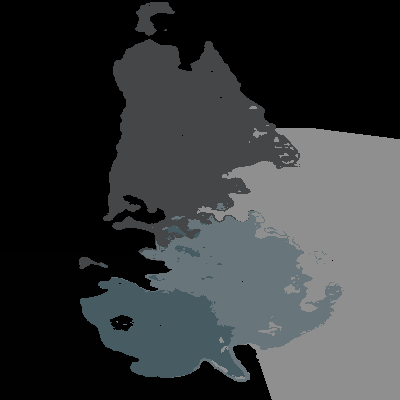

TypeError: Cannot handle this data type: (1, 1, 3), <f8

In [86]:
 cluster = slic(S,img,img_h,img_w,clusters,tag,dis)



In [87]:
#run 10 iterations of SLIC to refine segmentation
#save the final image as out_m_k.jpg
def slic(S,img,img_h,img_w,clusters,tag,dis):
    clusters = initial_cluster_center(S,img,img_h,img_w,clusters)
    reassign_cluster_center_acc_to_grad(clusters,img)
    for i in range(10): # usually the algortihm converges within 10 iterations
        assign_pixels_to_cluster(clusters,S,img,img_h,img_w,tag,dis)
        update_cluster_mean(clusters)
        if i == 9 : # to print the output after 10 iterations
            name = 'out_m_k.jpg'.format(loop=i, m=m, k=k)
            avg_color_cluster(img,name, clusters)
    return clusters

In [88]:
clusters

In [89]:
# superpixels
for c in clusters:
    print("H {} : W {}, l {}, a {}, b {}".format(c.h,c.w,c.l,c.a,c.b))

H 62 : W 60, l 0.0, a 0.0, b 0.0
H 31 : W 207, l 0.0, a 0.0, b 0.0
H 66 : W 331, l 0.0, a 0.0, b 0.0
H 192 : W 63, l 0.0, a 0.0, b 0.0
H 135 : W 182, l 30.09312557733186, a -9.286540462447729, b 1.0361836448754103
H 260 : W 332, l 59.41408538741747, a -9.319181864442916, b -0.7231587239328041
H 337 : W 89, l 0.39079099916954974, a 0.5229812132287875, b 0.18431003666960488
H 325 : W 160, l 39.05627648555634, a -21.959055841242108, b 12.494348732058713
H 281 : W 242, l 49.43156061674101, a -18.673679221847983, b 7.658854994221365


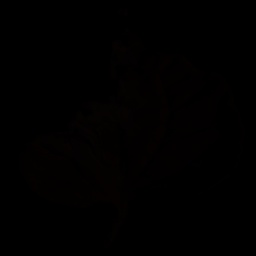

In [90]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread('/content/drive/MyDrive/out_m_k.jpg') #Assuming the image is saved as 'out_m_k.jpg'
cv2_imshow(img) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

In [91]:
from skimage import segmentation, color
from skimage.io import imread
#from skimage.future import graph # Remove this line
from matplotlib import pyplot as plt

img = imread('/content/drive/MyDrive/train_tomato2/Tomato_Early_blight/image1.jpg')

# Use 'skimage.segmentation' instead of 'skimage.future.graph' for image segmentation
img_segments = segmentation.slic(img, compactness=20, n_segments=500)
superpixels = color.label2rgb(img_segments, img, kind='avg')

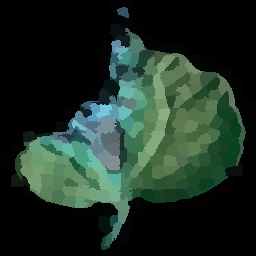

In [92]:
cv2_imshow(superpixels)

In [93]:
%matplotlib notebook
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2

image = cv2.imread('/content/drive/MyDrive/train_tomato2/Tomato_Early_blight/0034a551-9512-44e5-ba6c-827f85ecc688___RS_Erly.B 9432_final_masked.jpg')
height,width=image.shape[:2]
# ret, bw_img = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
segments = slic(image, n_segments = 100, sigma = 5)
# ax = fig.add_subplot(1, 1, 1)
a=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(a)
plt.subplot(122),plt.imshow(mark_boundaries(img_as_float(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)),segments,color=[255,0,0],mode='subpixel'))
# ax.imshow()
plt.axis("off")
plt.show()

<IPython.core.display.Javascript object>

In [94]:
height,width

(256, 256)

In [95]:
lab_image = cv2.cvtColor(a, cv2.COLOR_BGR2LAB)
plt.subplot(664),plt.imshow(lab_image),plt.title('LAB_IMAGE')

(<Axes: title={'center': 'LAB_IMAGE'}>,
 Text(0.5, 1.0, 'LAB_IMAGE'))

In [96]:
plt.imshow(segments)

In [97]:
!pip install scikit-image opencv-python matplotlib

In [98]:
count=[]
flag=0
from statistics import mean
d1_a=d1_b=d2_a=d2_b=[]
# Get unique segment IDs
unique_segments = np.unique(segments)

# Iterate through unique segment IDs. Iterate over each superpixel segment.
# compute min/max LAB values
for i in unique_segments:
    arr=[]
    coordinate=[]
    for j in range(height):
        print('j',j)
        counter=0
        for k in range(width):
                if segments[j,k]==i:
#                     print(j,k)
                    coordinate.append([j,k])
                    print(j,k)
                    arr.append(lab_image[j,k])
                    counter=counter+1
                    print(counter)
        print('j is now',j)
        count.append(counter)
    print('Final column of superpixel cluster',count)
    # row=j-init_j
    # col=k-init_k
    # print('Number of rows and columns of a cluster',row,col)
    # print('Final rows and columns',j,k)

    # Check if arr is empty before proceeding
    if not arr:
        print(f"Skipping segment {i} as it has no pixels.")
        continue  # Skip to the next segment ID

    print('Superpixel segment',arr)
    min_l=min([x[0] for x in arr])
    min_a=min([x[1] for x in arr])
    min_b=min([x[2] for x in arr])
    print(min_l,min_a,min_b)
    max_l=max([x[0] for x in arr])
    max_a=max([x[1] for x in arr])
    max_b=max([x[2] for x in arr])
    print(max_l,max_a,max_b)
    arr = np.asarray(arr)
#     vectorized=arr.reshape(-1,3)
# flattens the image into a list of colour features. runs K-means clustering(k=2) to find two dominant clusters
    vectorized=np.float32(arr)
    criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10, 1.0)
    k=2
    init_center=([min_l, min_a,  min_b], [max_l, max_a,  max_b])
    res1,label,center=cv2.kmeans(vectorized,k,np.array(init_center), criteria,10,cv2.KMEANS_RANDOM_CENTERS)
#     center=np.uint8(center)
    cluster_labels = (label.flatten()) # Assign the flattened labels to a new variable
    res2 = center[cluster_labels.astype(int)] #Use the new variable for indexing
    res3 = res2.reshape(arr.shape)
#                 # c=(label==0).flatten()
    reshape_label = label.reshape(-1, 1)
    #     plt.subplot(131),plt.imshow(reshape_label,cmap='gray')
    # plt.subplots_adjust(bottom=1.0, right=1.8, top=3.0, wspace = 0.5, hspace=0.5)
#     plt.subplot(132),plt.imshow(res3)
    # #             plt.hist(reshape_label.ravel(),4,[0,4]); plt.show()
#     plt.subplot(133),plt.imshow(arr)
    h,w=reshape_label.shape[:2]
    print('height,width of superpixel',h,w)
    for i in range(h):
        for j in range(w):
    #         print('i &j',i,'+',j)
    #         print(reshape_label[i,j])
            if reshape_label[i,0]==1:
    #             print('in if',reshape_label[i,j])
                d1_a.append(res3[i,1])
                d1_b.append(res3[i,2])
    #             print('values',d1_a[counter])
    #             print('values',d1_b[counter])
            else:
                d2_a.append(res3[i,1])
                d2_b.append(res3[i,2])
    #             print('values',d2_a[counter])
    #             print('values',d2_b[counter])
    #         counter=counter+1

    print(np.mean(d1_a))
    print(np.mean(d1_b))
    print(np.mean(d2_a))
    print(np.mean(d2_b))
    labels = list(label.reshape(1, -1)[0])
    lab_image = np.zeros_like(lab_image)
    for idx, value in enumerate(labels):
        if value == 0:
            print(value)
            x, y = coordinate[idx]
            print(x,y)
            print('arr[idx]',arr[idx])
            lab_image[x,y]=arr[idx]
            print('lab_image',lab_image[x,y])

    plt.imshow(lab_image)
#     if d1_a<= d2_a and d1_b <=d2_b:
#        print(label.index('0'))

Streaming output truncated to the last 5000 lines.
lab_image [0 0 0]
0
245 9
arr[idx] [0 0 0]
lab_image [0 0 0]
0
245 10
arr[idx] [0 0 0]
lab_image [0 0 0]
0
245 11
arr[idx] [0 0 0]
lab_image [0 0 0]
0
245 12
arr[idx] [0 0 0]
lab_image [0 0 0]
0
245 13
arr[idx] [0 0 0]
lab_image [0 0 0]
0
245 14
arr[idx] [0 0 0]
lab_image [0 0 0]
0
245 15
arr[idx] [0 0 0]
lab_image [0 0 0]
0
245 16
arr[idx] [0 0 0]
lab_image [0 0 0]
0
245 17
arr[idx] [0 0 0]
lab_image [0 0 0]
0
245 18
arr[idx] [0 0 0]
lab_image [0 0 0]
0
245 19
arr[idx] [0 0 0]
lab_image [0 0 0]
0
245 20
arr[idx] [0 0 0]
lab_image [0 0 0]
0
245 21
arr[idx] [0 0 0]
lab_image [0 0 0]
0
245 22
arr[idx] [0 0 0]
lab_image [0 0 0]
0
245 23
arr[idx] [0 0 0]
lab_image [0 0 0]
0
245 24
arr[idx] [0 0 0]
lab_image [0 0 0]
0
245 25
arr[idx] [0 0 0]
lab_image [0 0 0]
0
246 0
arr[idx] [0 0 0]
lab_image [0 0 0]
0
246 1
arr[idx] [0 0 0]
lab_image [0 0 0]
0
246 2
arr[idx] [0 0 0]
lab_image [0 0 0]
0
246 3
arr[idx] [0 0 0]
lab_image [0 0 0]
0
246 4
arr[

In [99]:
res3.shape

(563, 3)

In [100]:
arr.shape

(563, 3)

In [101]:
res2

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [102]:
res3

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [103]:
print(lab_image[:3, :3])

[[[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]


In [104]:
lab_image[:3,:3]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [105]:
segments

array([[ 1,  1,  1, ..., 10, 10, 10],
       [ 1,  1,  1, ..., 10, 10, 10],
       [ 1,  1,  1, ..., 10, 10, 10],
       ...,
       [92, 92, 92, ..., 90, 90, 90],
       [92, 92, 92, ..., 90, 90, 90],
       [92, 92, 92, ..., 90, 90, 90]])

In [106]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


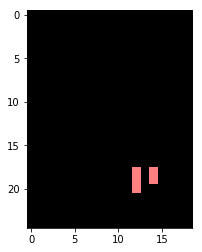

In [ ]:
empty_arr

NameError: name 'empty_arr' is not defined

find indexes of occurrences of 7 in list x

In [107]:
x = [5,1,7,0,3,4,5,3,2,6,7,3,6]
get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
print(get_indexes(7,x))


[2, 10]


In [110]:
# find indexes of pixels in segment 0
#sets their corresponding values in arr to zero
indexes = [i for i,x in enumerate(label) if x == 0]
for index in indexes:  # Loop through indexes directly
  arr[index] = 0  # Use index to access and modify arr

In [111]:

coordinate[2]
arr[indexes]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [112]:
#print small sections of lab_image, segments and labels

label=label.flatten() #flatten label array
print(label)
get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
print(get_indexes(0,x))  #find indeces of pixels labelled 0

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [113]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [114]:
segments

array([[ 1,  1,  1, ..., 10, 10, 10],
       [ 1,  1,  1, ..., 10, 10, 10],
       [ 1,  1,  1, ..., 10, 10, 10],
       ...,
       [92, 92, 92, ..., 90, 90, 90],
       [92, 92, 92, ..., 90, 90, 90],
       [92, 92, 92, ..., 90, 90, 90]])

In [115]:
res3.shape

(563, 3)

In [116]:
reshape_label.shape

(563, 1)

In [117]:
# res2=res2.reshape(3,3,3)
res2

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [118]:
""" Iterates over unique superpixel segments. Extracts all pixel values (LAB)
from each segment. Finds min/max values of L, A, B channels for each segment.
Perfoms K-means clustering (k=2) on superpixels.
Groups pixels into two clusters within each superpixels.Separate clusters into
two groups based on label. Computes the mean A/B values of both groups. """

from statistics import mean

d1_a, d1_b, d2_a, d2_b = [], [], [], []

# Get unique segment IDs
unique_segments = np.unique(segments)

# Iterate through unique segment IDs
for i in unique_segments:
    arr = []
    coordinate = []

    for j in range(height):
        counter = 0
        for k in range(width):
            if segments[j, k] == i:
                coordinate.append([j, k])
                arr.append(lab_image[j, k])
                counter += 1
        count.append(counter)

    if not arr:  # Check if segment has no pixels
        print(f"Skipping segment {i} as it has no pixels.")
        continue

    arr = np.asarray(arr)

    min_l, min_a, min_b = np.min(arr[:, 0]), np.min(arr[:, 1]), np.min(arr[:, 2])
    max_l, max_a, max_b = np.max(arr[:, 0]), np.max(arr[:, 1]), np.max(arr[:, 2])

    vectorized = np.float32(arr)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    k = 2
    init_center = np.float32([[min_l, min_a, min_b], [max_l, max_a, max_b]])

    _, label, center = cv2.kmeans(vectorized, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    cluster_labels = label.flatten().astype(np.int32)
    res2 = center[cluster_labels]
    res3 = res2.reshape(arr.shape)

    reshape_label = label.reshape(-1, 1)

    h, w = reshape_label.shape[:2]
    print('Height, Width of Superpixel:', h, w)

    for i in range(h):
        for j in range(w):
            if reshape_label[i, 0] == 1:
                d1_a.append(res3[i, 1])
                d1_b.append(res3[i, 2])
            else:
                d2_a.append(res3[i, 1])
                d2_b.append(res3[i, 2])

    print("Mean A/B values of Cluster 1:", np.mean(d1_a), np.mean(d1_b))
    print("Mean A/B values of Cluster 2:", np.mean(d2_a), np.mean(d2_b))



Height, Width of Superpixel: 676 1
Mean A/B values of Cluster 1: 0.0 0.0
Mean A/B values of Cluster 2: 0.0 0.0
Height, Width of Superpixel: 676 1
Mean A/B values of Cluster 1: 0.0 0.0
Mean A/B values of Cluster 2: 0.0 0.0
Height, Width of Superpixel: 665 1
Mean A/B values of Cluster 1: 0.0 0.0
Mean A/B values of Cluster 2: 0.0 0.0
Height, Width of Superpixel: 767 1
Mean A/B values of Cluster 1: 0.0 0.0
Mean A/B values of Cluster 2: 0.0 0.0
Height, Width of Superpixel: 677 1
Mean A/B values of Cluster 1: 0.0 0.0
Mean A/B values of Cluster 2: 0.0 0.0
Height, Width of Superpixel: 702 1
Mean A/B values of Cluster 1: 0.0 0.0
Mean A/B values of Cluster 2: 0.0 0.0
Height, Width of Superpixel: 676 1
Mean A/B values of Cluster 1: 0.0 0.0
Mean A/B values of Cluster 2: 0.0 0.0
Height, Width of Superpixel: 676 1
Mean A/B values of Cluster 1: 0.0 0.0
Mean A/B values of Cluster 2: 0.0 0.0
Height, Width of Superpixel: 650 1
Mean A/B values of Cluster 1: 0.0 0.0
Mean A/B values of Cluster 2: 0.0 0.0
H

In [119]:
reshape_label.shape

(563, 1)

In [120]:
reshape_label

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [121]:
d2_a

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [123]:
a=[]
# a[1]=(res2[0,0,1])
a.append(res2[0,1])

In [125]:
# Assuming 'res2' contains your original (563, 3) data
# If you want to select only a portion to reshape:
reshaped_res2 = res2[:9].reshape(3, 3, 3)  # Select first 9 elements only
#Then display
plt.imshow(reshaped_res2)
# OR If the intent was to view the original res2 data as is:
plt.imshow(res2) # In this case you don't need reshape

In [126]:
len(a)

1

In [127]:
x=[]
lab_image[0,0]
i=0
for record in lab_image:
    x.append(record)


In [128]:
plt.imshow(x)

In [129]:
lab_image.ndim


3

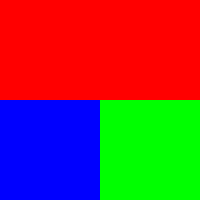

-1

In [130]:
#creating test image with 3 colours using numpy
#stack horizontally and vertically
import cv2
import numpy as np

a = np.zeros((100, 100,3))
a[:,:,0] = 255

b = np.zeros((100, 100,3))
b[:,:,1] = 255

c = np.zeros((100, 200,3))
c[:,:,2] = 255

img = np.vstack((c, np.hstack((a, b))))

cv2_imshow(img)
cv2.waitKey(0)

In [131]:
from skimage.segmentation import slic, mark_boundaries
from skimage.util import img_as_float
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load image with error handling
image_path = '/content/drive/MyDrive/train_tomato2/Tomato_Early_blight/0114f7b3-7f56-4bef-aa47-7a82da142d4b___RS_Erly.B 7437_final_masked.jpg'
image = cv2.imread(image_path)

if image is None:
    print("❌ Error: Image not found. Check file path.")
    exit()

# Convert image to RGB for Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert image to float format for SLIC
image_float = img_as_float(image)

# Apply SLIC segmentation
segments = slic(image_float, n_segments=100, sigma=5)

# Display Original and SLIC Segmented Image
plt.figure(figsize=(10,5))

plt.subplot(121), plt.imshow(image_rgb), plt.title("Original Image")
plt.subplot(122), plt.imshow(mark_boundaries(image_rgb, segments, color=[255,0,0])), plt.title("SLIC Superpixels")

plt.axis("off")
plt.show()


<IPython.core.display.Javascript object>

In [132]:
plt.imshow(segments)

In [134]:
            vectorized=a.reshape(-1,1)
            vectorized=np.float32(vectorized)
            criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10, 1.0)
            k=4
            res1,label,center=cv2.kmeans(vectorized,k,None, criteria,10,cv2.KMEANS_RANDOM_CENTERS)
            center=np.uint8(center)
            c=(label.flatten())
            res2 = center[c.astype(int)]
            res3= res2.reshape((a.shape))
            # c=(label==0).flatten()
            reshape_label=label.reshape(100,100,3) # Reshape to match 'a' shape
#             plt.subplot(111),plt.imshow(reshape_label,cmap='gray')
            plt.imshow(res3)
#             plt.hist(reshape_label.ravel(),4,[0,4]); plt.show()

In [135]:
a.shape

(100, 100, 3)

In [136]:
vectorized.shape

(30000, 1)

In [137]:
            vectorized=a.reshape(-1,1)
            vectorized=np.float32(vectorized)
            criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10, 1.0)
            k=2
#             init_center=([105, 112,  79], [110, 117,  83], [122, 126,  91],[0,0,0])
            res1,label,center=cv2.kmeans(vectorized,k,None, criteria,10,cv2.KMEANS_RANDOM_CENTERS)
            center=np.uint8(center)
            c=(label.flatten())
            res2 = center[c.astype(int)]
            res3= res2.reshape((a.shape))
            # c=(label==0).flatten()
#             reshape_label=label.reshape(1032,581,3)
#             plt.subplot(111),plt.imshow(reshape_label,cmap='gray')
            plt.imshow(res3)
#             plt.hist(reshape_label.ravel(),4,[0,4]); plt.show()

In [138]:
vectorized.shape

(30000, 1)

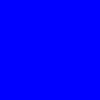

In [140]:
cv2_imshow(res3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [141]:
reshape_label

array([[[2, 0, 0],
        [2, 0, 0],
        [2, 0, 0],
        ...,
        [2, 0, 0],
        [2, 0, 0],
        [2, 0, 0]],

       [[2, 0, 0],
        [2, 0, 0],
        [2, 0, 0],
        ...,
        [2, 0, 0],
        [2, 0, 0],
        [2, 0, 0]],

       [[2, 0, 0],
        [2, 0, 0],
        [2, 0, 0],
        ...,
        [2, 0, 0],
        [2, 0, 0],
        [2, 0, 0]],

       ...,

       [[2, 0, 0],
        [2, 0, 0],
        [2, 0, 0],
        ...,
        [2, 0, 0],
        [2, 0, 0],
        [2, 0, 0]],

       [[2, 0, 0],
        [2, 0, 0],
        [2, 0, 0],
        ...,
        [2, 0, 0],
        [2, 0, 0],
        [2, 0, 0]],

       [[2, 0, 0],
        [2, 0, 0],
        [2, 0, 0],
        ...,
        [2, 0, 0],
        [2, 0, 0],
        [2, 3, 1]]], dtype=int32)

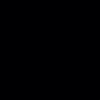

In [143]:
cv2_imshow(reshape_label)

In [144]:
c.shape

(30000,)

In [145]:
image.shape

(256, 256, 3)